In [2]:
%pylab
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
#import progressbar

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
# The initial size of the First layer
input_size = 784

# The hidden state size
hidden_size = 500

# Number of different classes in MNIST classification task
num_classes = 10

# Total number of iteration/epochs we will be running our network
num_epochs = 5

# Number of example(batch_size) to be fed to the network at once
batch_size = 100

# The rate at which the network learns/unlearns
learning_rate = 0.001

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=1, shuffle=True)



Processing...
Done!


In [5]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=1000)

In [6]:
print ('==>>> total trainning batch number: {}'.format(len(train_loader)))
print ('==>>> total testing batch number: {}'.format(len(test_loader)))

==>>> total trainning batch number: 60000
==>>> total testing batch number: 10


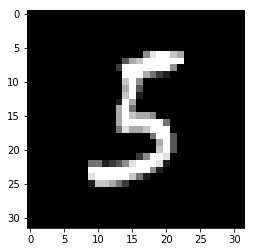

In [7]:
images,_ = next(iter(train_loader))
i = torchvision.utils.make_grid(images).numpy()
i = np.transpose(i,(1,2,0))
plt.imshow(i)

In [8]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [9]:
net = Net(input_size, hidden_size, num_classes)
net

Net (
  (fc1): Linear (784 -> 500)
  (relu): ReLU ()
  (fc2): Linear (500 -> 10)
)

In [11]:
train_loss_mlp = []
train_accu_mlp = []

criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  

#bar = progressbar.ProgressBar()
for epoch in (range(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        
        train_loss_mlp.append(loss.data[0])
        optimizer.step()
        
        prediction = outputs.data.max(1)[1]   # first column has actual prob.
        accuracy = prediction.eq(labels.data).sum()/batch_size*100
        train_accu_mlp.append(accuracy)
        
        
        if (i+1) % 500 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, 3750//batch_size, loss.data[0]))

Epoch [1/5], Step [500/37], Loss: 0.7273
Epoch [1/5], Step [1000/37], Loss: 0.2271
Epoch [1/5], Step [1500/37], Loss: 0.9499
Epoch [1/5], Step [2000/37], Loss: 3.2495
Epoch [1/5], Step [2500/37], Loss: 0.0020
Epoch [1/5], Step [3000/37], Loss: 2.8271
Epoch [1/5], Step [3500/37], Loss: 0.0012
Epoch [1/5], Step [4000/37], Loss: 0.0024
Epoch [1/5], Step [4500/37], Loss: 0.0042
Epoch [1/5], Step [5000/37], Loss: 0.0115
Epoch [1/5], Step [5500/37], Loss: 0.0000
Epoch [1/5], Step [6000/37], Loss: 0.0602
Epoch [1/5], Step [6500/37], Loss: 0.0001
Epoch [1/5], Step [7000/37], Loss: 0.7208
Epoch [1/5], Step [7500/37], Loss: 0.0119
Epoch [1/5], Step [8000/37], Loss: 0.0000
Epoch [1/5], Step [8500/37], Loss: 0.0000
Epoch [1/5], Step [9000/37], Loss: 0.0401
Epoch [1/5], Step [9500/37], Loss: 0.0000
Epoch [1/5], Step [10000/37], Loss: 0.0000
Epoch [1/5], Step [10500/37], Loss: 0.0002
Epoch [1/5], Step [11000/37], Loss: 0.0781
Epoch [1/5], Step [11500/37], Loss: 1.4436
Epoch [1/5], Step [12000/37], L

KeyboardInterrupt: 

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

In [ ]:
plt.plot(np.arange(len(train_loss_mlp)), train_loss_mlp)

In [ ]:
plt.plot(np.arange(len(train_accu_mlp)), train_accu_mlp)

In [12]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 96 %


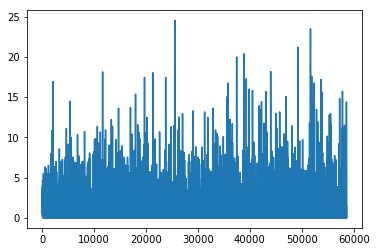

In [13]:
plt.plot(np.arange(len(train_loss_mlp)), train_loss_mlp)

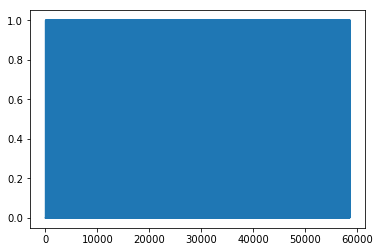

In [14]:
plt.plot(np.arange(len(train_accu_mlp)), train_accu_mlp)

In [15]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=1, shuffle=True)



 3
[torch.LongTensor of size 1]



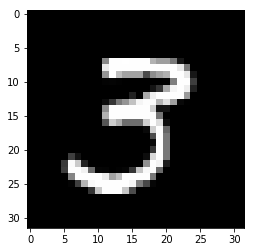

In [16]:
data,target = next(iter(train_loader))

i = torchvision.utils.make_grid(data).numpy()
i = np.transpose(i,(1,2,0))
plt.imshow(i)

data, target = Variable(data.view(-1, 28*28), volatile=True), Variable(target)
output = net(data)
prediction = output.data.max(1)[1]
correct += prediction.eq(target.data).sum()
# print('\nTest set: Accuracy: {:.2f}%'.format(100. * correct / len(test_loader.dataset)))

print(prediction)


 5
[torch.LongTensor of size 1]



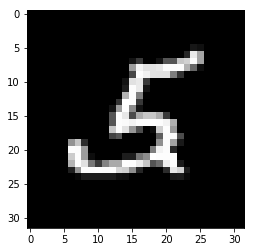

In [17]:
data,target = next(iter(train_loader))

i = torchvision.utils.make_grid(data).numpy()
i = np.transpose(i,(1,2,0))
plt.imshow(i)

data, target = Variable(data.view(-1, 28*28), volatile=True), Variable(target)
output = net(data)
prediction = output.data.max(1)[1]
correct += prediction.eq(target.data).sum()
# print('\nTest set: Accuracy: {:.2f}%'.format(100. * correct / len(test_loader.dataset)))

print(prediction)


 3
[torch.LongTensor of size 1]



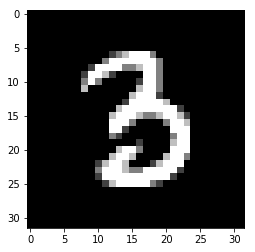

In [18]:
data,target = next(iter(train_loader))

i = torchvision.utils.make_grid(data).numpy()
i = np.transpose(i,(1,2,0))
plt.imshow(i)

data, target = Variable(data.view(-1, 28*28), volatile=True), Variable(target)
output = net(data)
prediction = output.data.max(1)[1]
correct += prediction.eq(target.data).sum()
# print('\nTest set: Accuracy: {:.2f}%'.format(100. * correct / len(test_loader.dataset)))

print(prediction)